In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.api as smt
from scipy import stats as st
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.ensemble import RandomForestRegressor

In [65]:
df=pd.read_csv('auto-mpg.csv')

In [66]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [67]:
print('Number of  rows are :',df.shape[0])

print('Number od columns are:',df.shape[1])

Number of  rows are : 398
Number od columns are: 9


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [69]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [70]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [71]:
d=df[df['horsepower']!='?']

In [72]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [73]:
d['horsepower']=pd.to_numeric(d['horsepower'])

In [74]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [75]:
d.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [76]:
d.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## mpg

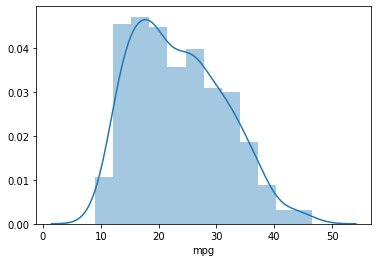

In [77]:
sns.distplot(d.mpg)

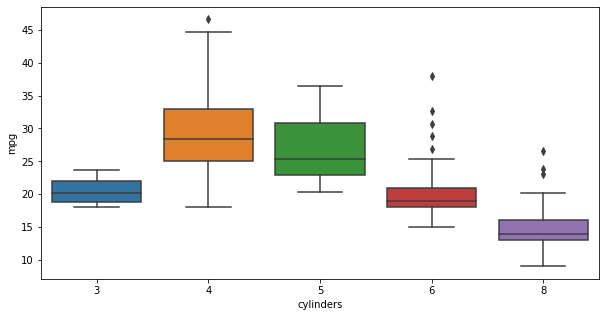

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(y=d.mpg,x=d.cylinders)

### Cylinders

In [79]:
d.cylinders.value_counts(normalize=True)*100

4    50.765306
8    26.275510
6    21.173469
3     1.020408
5     0.765306
Name: cylinders, dtype: float64

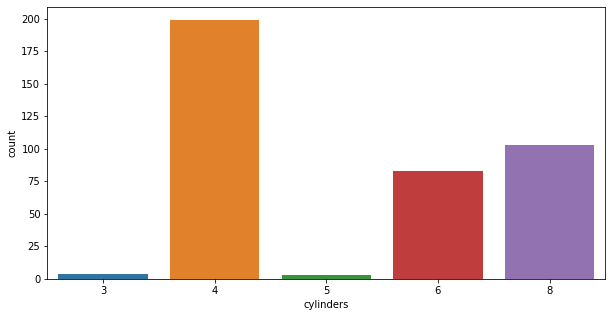

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(d.cylinders)

### Displacement

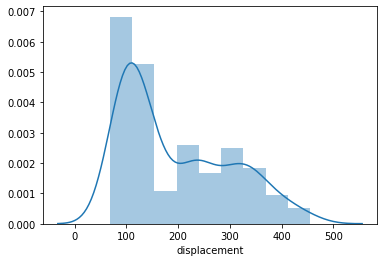

In [81]:
sns.distplot(d.displacement)

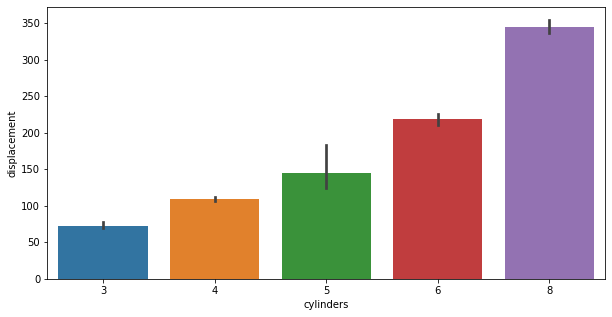

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x=d.cylinders,y=d.displacement)

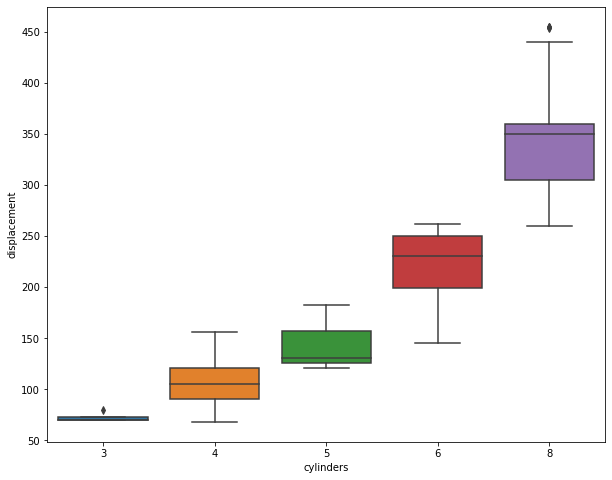

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(y=d.displacement,x=d.cylinders)

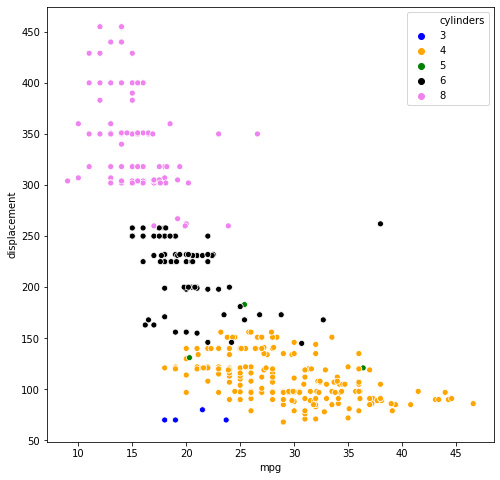

In [84]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=d.mpg, y=d.displacement,hue=d.cylinders,palette={3:'blue',4:'orange',5:'green',6:'black',8:'violet'})

### Horsepower

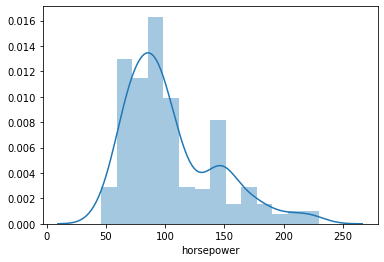

In [85]:
sns.distplot(d.horsepower)

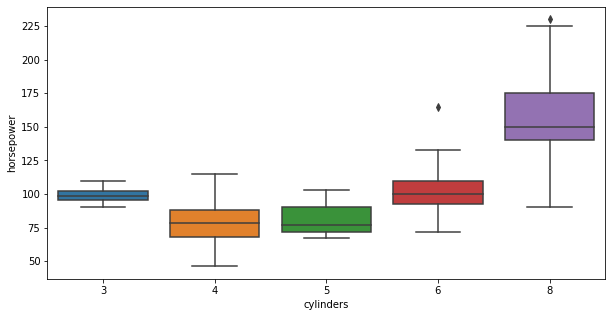

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(y=d.horsepower,x=d.cylinders)

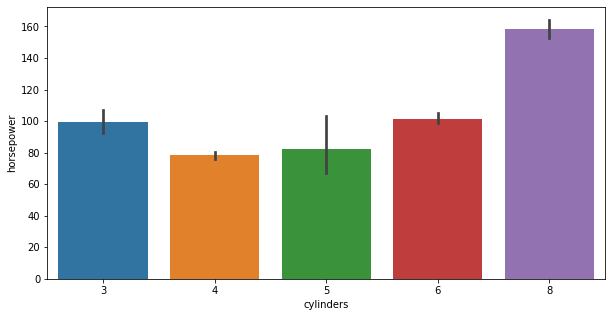

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(x=d.cylinders,y=d.horsepower)

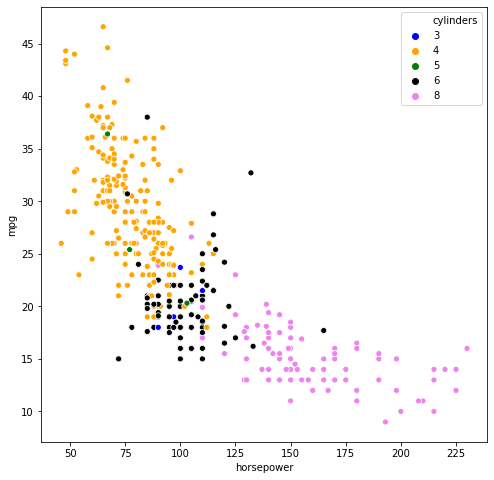

In [88]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=d.horsepower, y=d.mpg,hue=d.cylinders,palette={3:'blue',4:'orange',5:'green',6:'black',8:'violet'})

### Weight

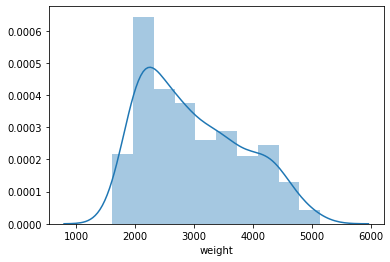

In [89]:
sns.distplot(d.weight)

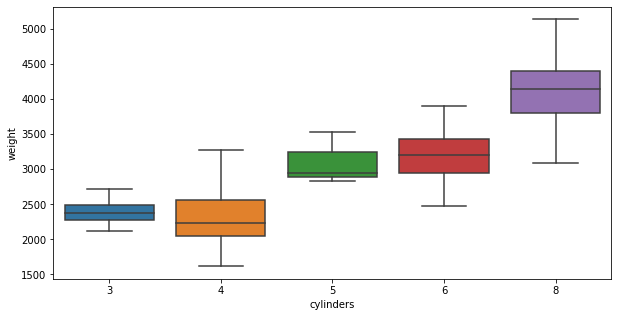

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(y=d.weight,x=d.cylinders)

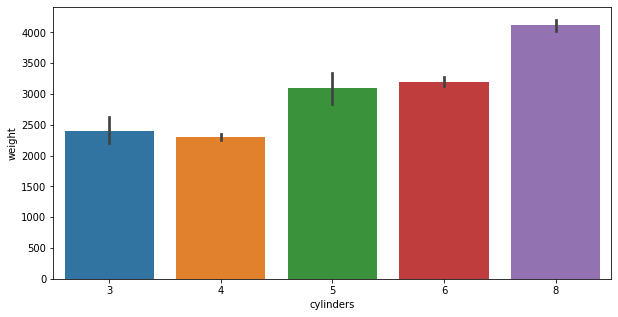

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x=d.cylinders,y=d.weight)

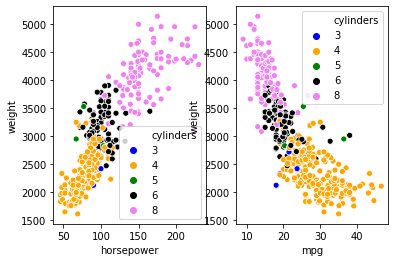

In [92]:
f,axes=plt.subplots(1,2)
sns.scatterplot(x=d.horsepower, y=d.weight,hue=d.cylinders,palette={3:'blue',4:'orange',5:'green',6:'black',8:'violet'},ax=axes[0])

sns.scatterplot(x=d.mpg,y=d.weight,hue=d.cylinders,palette={3:'blue',4:'orange',5:'green',6:'black',8:'violet'},ax=axes[1])

### Acceleration

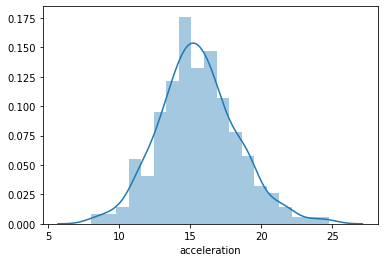

In [93]:
sns.distplot(d.acceleration)

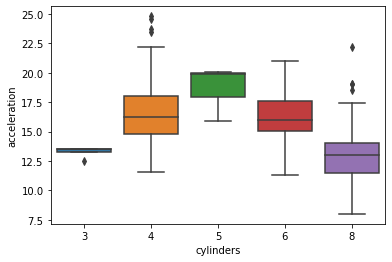

In [94]:
sns.boxplot(x=d.cylinders,y=d.acceleration)

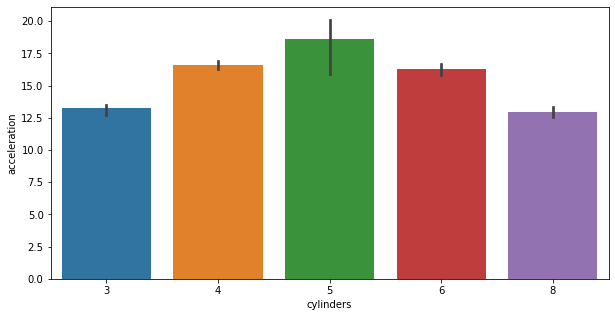

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x=d.cylinders,y=d.acceleration)

### Model Year

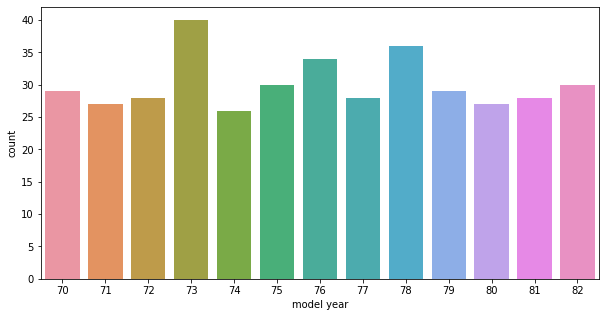

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(d['model year'])

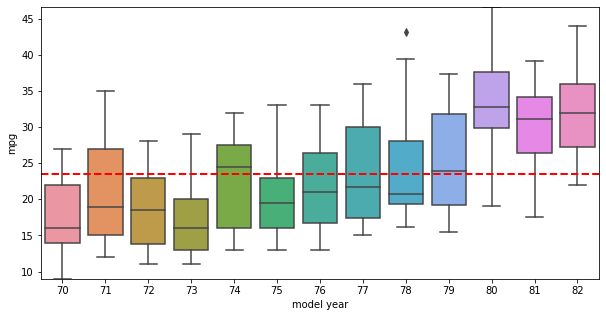

In [97]:
plt.figure(figsize=(10,5))
fig=sns.boxplot(y=d.mpg,x=d['model year'])
fig.axis(ymin=9, ymax=46.6)
plt.axhline(d.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Origin

In [98]:
d.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

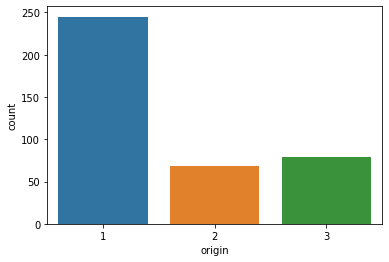

In [99]:
sns.countplot(d.origin)

In [100]:
d.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
origin,,,,,,,
1,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204,75.591837
2,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118,75.676471
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


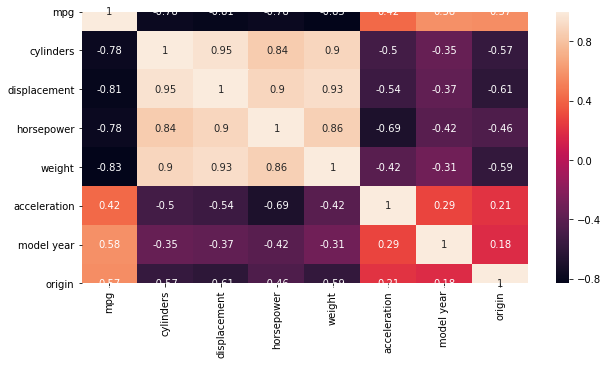

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(d.corr(),annot=True,)

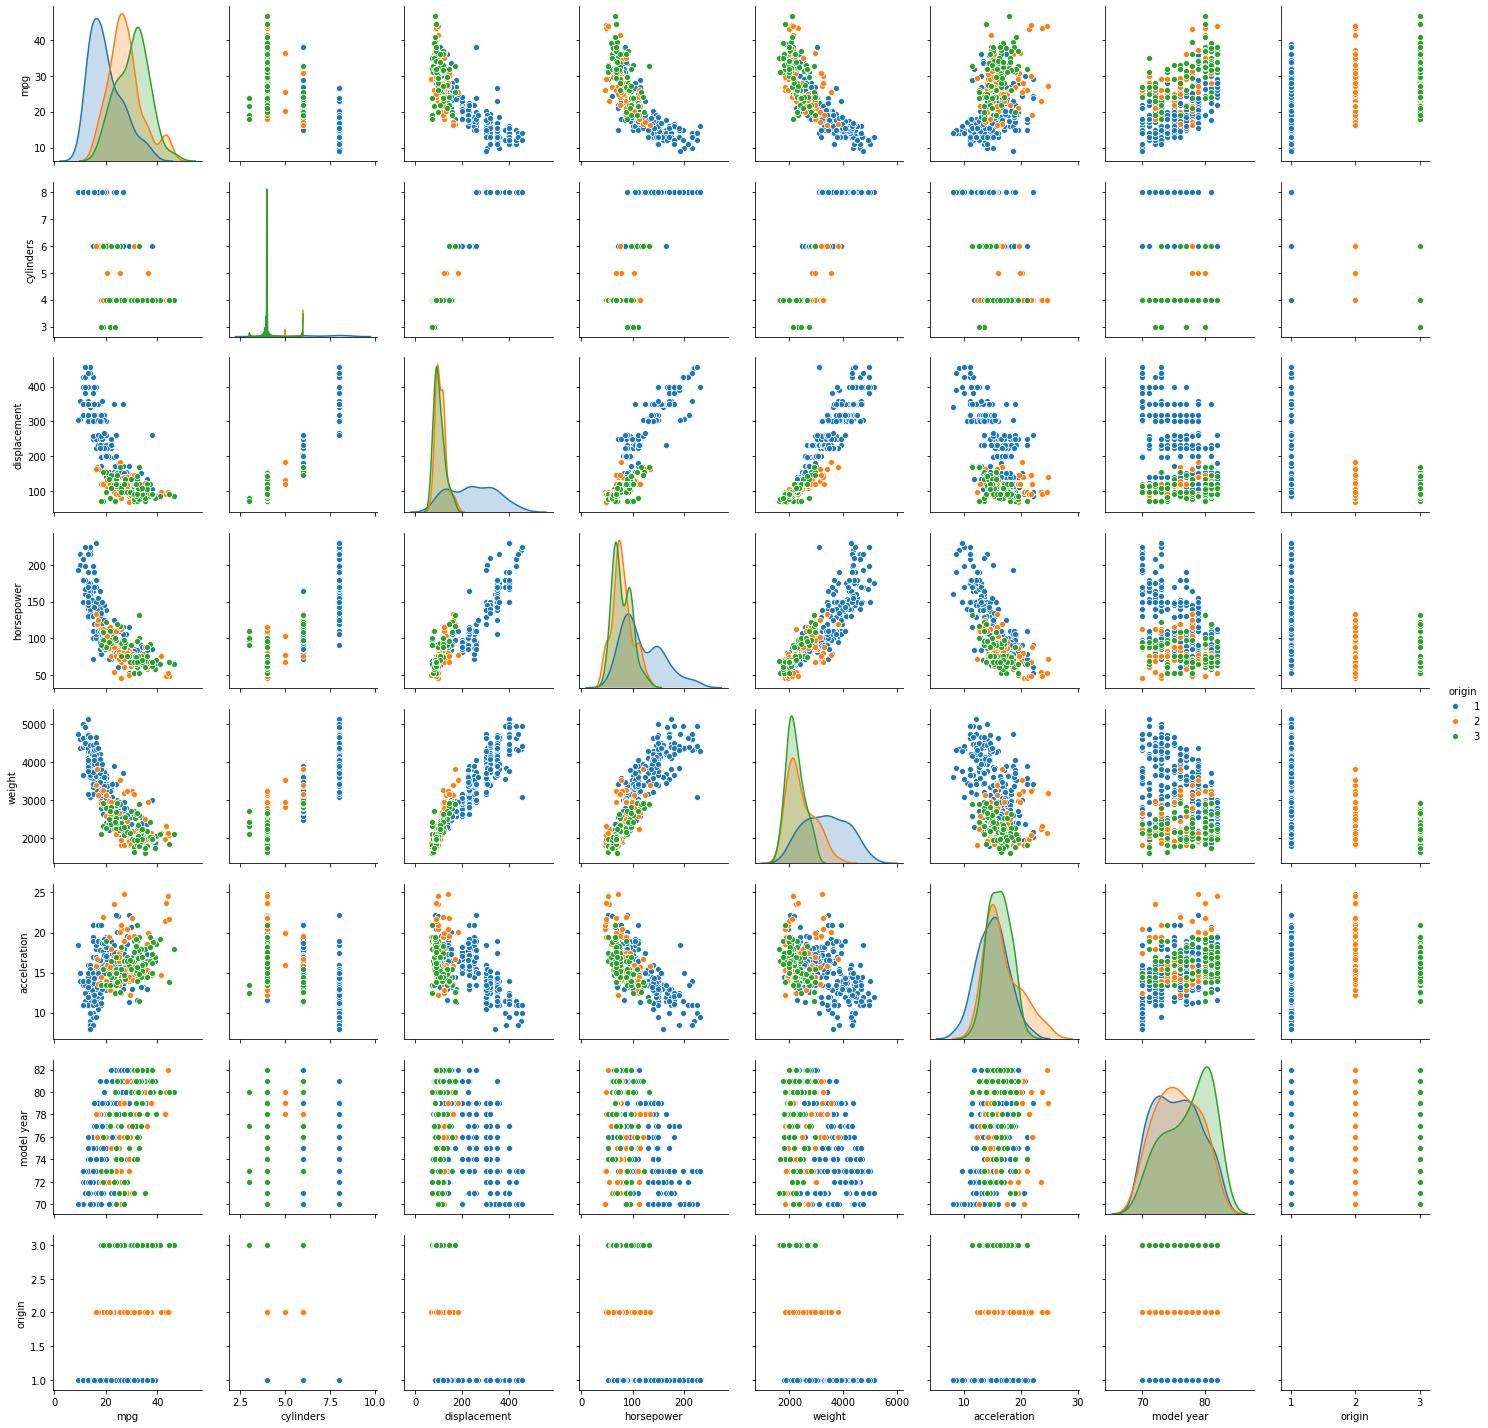

In [102]:
sns.pairplot(d,hue='origin')

## Model Building.

In [103]:
df=d.drop(['origin','model year','car name'],axis=1)

In [104]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


In [105]:
x=df.drop('mpg',axis=1)
y=df.mpg

In [106]:
xs=sm.add_constant(x)
model=sm.OLS(y,xs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          9.82e-101
Time:                        10:17:48   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking assumption

#### 1-No autocorrelaton

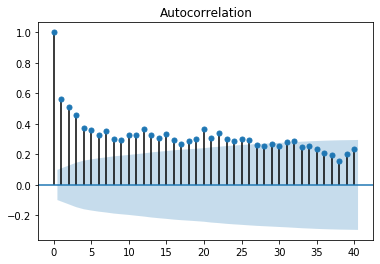

In [107]:
acf=smt.graphics.plot_acf(model.resid, lags=40, alpha=0.05)
acf.show()

#### 2-Normality of residuals.

In [108]:
st.jarque_bera(model.resid)

(52.73741337123248, 3.5336178427769482e-12)

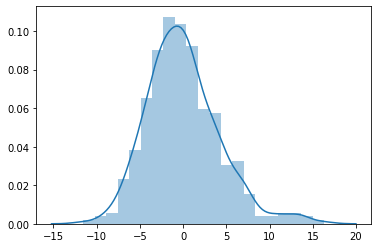

In [109]:
sns.distplot(model.resid)

#### 3- Linearity of residuals

In [110]:
sm.stats.diagnostic.linear_rainbow(model,frac=0.02)

(2480.982843639171, 0.016007257158351534)

#### 4-Homoscedasity

In [111]:
sms.het_goldfeldquandt(model.resid, model.model.exog)


(2.6166108833762496, 4.032768985014241e-11, 'increasing')

#### 5- Multicollinearity

In [112]:
pd.DataFrame([vif(xs.values, i)for i in range(xs.shape[1])],index=xs.columns,columns=['vif'])

,vif
const,154.860110
cylinders,10.630870
displacement,19.535061
horsepower,8.916017
weight,10.430271
acceleration,2.609487


In [113]:
df1=np.log(df)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,2.890372,2.079442,5.726848,4.867534,8.161660,2.484907
1,2.708050,2.079442,5.857933,5.105945,8.214194,2.442347
2,2.890372,2.079442,5.762051,5.010635,8.142063,2.397895
3,2.772589,2.079442,5.717028,5.010635,8.141190,2.484907
4,2.833213,2.079442,5.710427,4.941642,8.145840,2.351375
...,...,...,...,...,...,...
393,3.295837,1.386294,4.941642,4.454347,7.933797,2.747271
394,3.784190,1.386294,4.574711,3.951244,7.663877,3.202746
395,3.465736,1.386294,4.905275,4.430817,7.738488,2.451005
396,3.332205,1.386294,4.787492,4.369448,7.872836,2.923162


In [114]:
x=df1.drop('mpg',axis=1)
y=df1.mpg 

In [115]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc,random_state=3).fit


In [116]:
cols=list(xc.columns)

while len(cols)>1:
    x1=xc[cols]
    model=sm.OLS(y,x1,random_state=3).fit()
    p=model.pvalues
    max_p=p.max()
    feat_max=p.idxmax()
    if max_p>0.05:
        print('columns removed',feat_max,' ', 'prob',max_p)
        cols.remove(feat_max)
    else:
        break
print('Significant features are')
print(cols)

columns removed cylinders   prob 0.16210873436509352
Significant features are
['const', 'displacement', 'horsepower', 'weight', 'acceleration']


In [117]:
x.drop('cylinders',axis=1,inplace=True)

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

### Linear Regression model.

In [133]:
lr=LinearRegression()

In [134]:
model_lr=lr.fit(x_train,y_train)

In [143]:
test_score=model_lr.score(x_test,y_test)

In [144]:
print("linear regression test score:", test_score)

linear regression test score: 0.838738432545701


### RandomForest Regressor.

In [146]:
model_rf = RandomForestRegressor(n_estimators=50)

In [147]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
model_rf.score(x_test,y_test)

0.8531708106354781